In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
!cat 1gram.tsv  | egrep "^[a-zA-Z][a-zA-Z0-9'-]+\t" | head -1000000  > /tmp/1

In [3]:
df = pd.read_csv('/tmp/1', sep='\t', header=-1)

In [4]:
df.describe()

,1
count,1.000000e+06
mean,3.658549e+05
std,3.496562e+07
min,1.390000e+03
25%,2.213000e+03
50%,4.311000e+03
75%,1.399025e+04
max,2.368841e+10


In [5]:
df.columns = ['token', 'count']

In [6]:
df.count = df['count'].astype(float)

In [7]:
total = df.count.sum()

In [8]:
df['p'] = df.count / total
df['log_p'] = np.log2(df['p'])
df['ent'] = df['p'] * df['log_p']

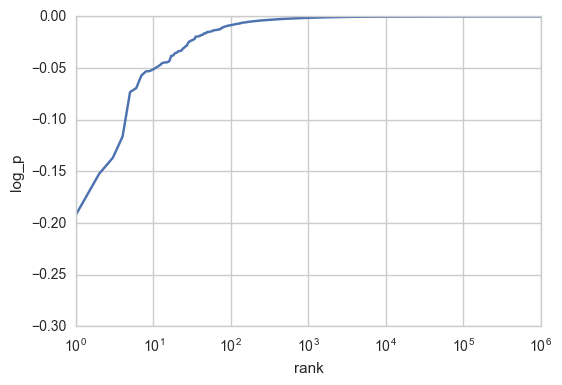

In [9]:
plt.plot(df.ent)
#plt.plot(df.log_p)
plt.xlabel('rank')
plt.ylabel('log_p')
plt.xscale('log')

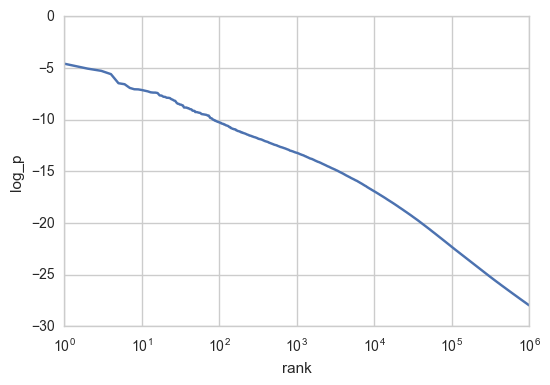

In [10]:
#plt.plot(df.ent)
plt.plot(df.log_p)
plt.xlabel('rank')
plt.ylabel('log_p')
plt.xscale('log')

In [11]:
def rank_to_word(i):
    if i < 10**1: return 'extremely common'
    if i < 10**2: return 'very common'
    if i < 10**3: return 'common'
    if i < 10**4: return 'common'
    if i < 10**5: return 'uncommon'
    return 'rare'

In [12]:
df['description'] = df.index.map(rank_to_word)

In [13]:
df.head(100)

,token,count,p,log_p,ent,description
0,the,23688414489,0.064748,-3.949018,-0.255691,extremely common
1,of,15342397280,0.041936,-4.575676,-0.191884,extremely common
2,and,11021132912,0.030124,-5.052927,-0.152216,extremely common
3,to,9494905988,0.025953,-5.267974,-0.136718,extremely common
4,in,7611765281,0.020805,-5.586897,-0.116238,extremely common
5,is,4139526351,0.011315,-6.465662,-0.073157,extremely common
6,that,3870260345,0.010579,-6.562697,-0.069425,extremely common
7,for,3021925527,0.008260,-6.919660,-0.057156,extremely common
8,The,2763139452,0.007553,-7.048819,-0.053237,extremely common
9,was,2737725870,0.007483,-7.062150,-0.052847,extremely common


In [14]:
df.tail(20)

,token,count,p,log_p,ent,description
999980,A297,1391,3.802054e-09,-27.970574,-1.063456e-07,rare
999981,A'd,1391,3.802054e-09,-27.970574,-1.063456e-07,rare
999982,zahllose,1390,3.799321e-09,-27.971611,-1.062731e-07,rare
999983,zable,1390,3.799321e-09,-27.971611,-1.062731e-07,rare
999984,windchests,1390,3.799321e-09,-27.971611,-1.062731e-07,rare
999985,waterhouse,1390,3.799321e-09,-27.971611,-1.062731e-07,rare
999986,warious,1390,3.799321e-09,-27.971611,-1.062731e-07,rare
999987,wTiich,1390,3.799321e-09,-27.971611,-1.062731e-07,rare
999988,voluntaristically,1390,3.799321e-09,-27.971611,-1.062731e-07,rare
999989,urca,1390,3.799321e-09,-27.971611,-1.062731e-07,rare


In [15]:
df['ent'].sum()

-11.363182811371207

In [16]:
df.ix[np.random.choice(df.index.values, 50)].sort_index()

,token,count,p,log_p,ent,description
8266,professors,3797547,1.037993e-05,-16.555844,-1.718485e-04,common
54243,Quin,211150,5.771414e-07,-20.724572,-1.196101e-05,uncommon
72945,Stripped,124856,3.412719e-07,-21.482575,-7.331400e-06,uncommon
73186,datable,124213,3.395144e-07,-21.490024,-7.296173e-06,uncommon
118217,trencher,52332,1.430403e-07,-22.737075,-3.252319e-06,rare
123436,pneumoperitoneum,48419,1.323448e-07,-22.849195,-3.023973e-06,rare
128403,repurchases,45180,1.234916e-07,-22.949084,-2.834019e-06,rare
130137,Englund,44087,1.205041e-07,-22.984415,-2.769715e-06,rare
155112,hemline,32288,8.825357e-08,-23.433770,-2.068114e-06,rare
159002,legi,30920,8.451438e-08,-23.496228,-1.985769e-06,rare
